In [6]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import numpy as np

rc('animation', html='html5')

COVID19_MALAY = "covid-19-malaysia.csv"

FONT_SIZE = 18

main_df = pd.read_csv(COVID19_MALAY, header=0)
print(main_df)

         date   cases  discharged  death   icu
0   24/1/2020     0.0         0.0    0.0   0.0
1   25/1/2020     3.0         0.0    0.0   0.0
2   26/1/2020     4.0         0.0    0.0   0.0
3   27/1/2020     4.0         0.0    0.0   0.0
4   28/1/2020     4.0         0.0    0.0   0.0
..        ...     ...         ...    ...   ...
63  27/3/2020  2161.0       259.0   26.0  54.0
64  28/3/2020  2320.0       320.0   27.0  73.0
65  29/3/2020  2470.0       388.0   34.0  73.0
66  30/3/2020  2626.0       479.0   37.0  94.0
67  31/3/2020     NaN         NaN    NaN   NaN

[68 rows x 5 columns]


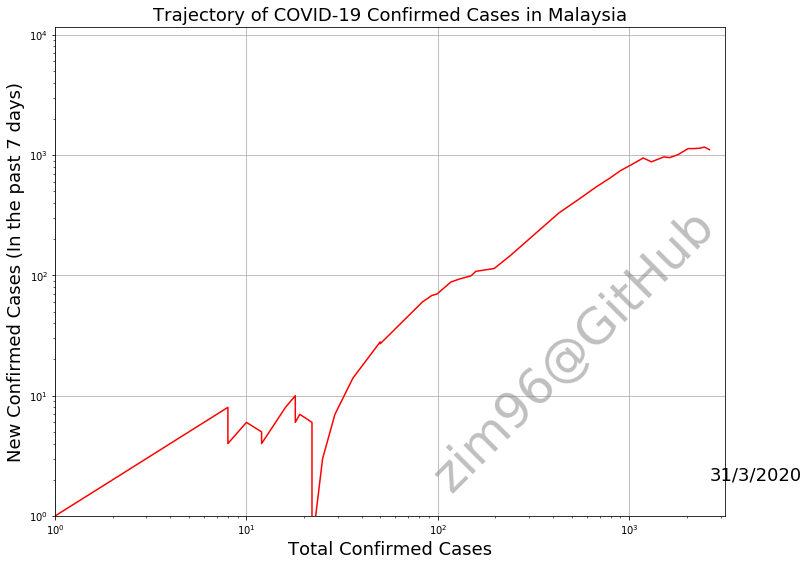

In [14]:
# Trajectory of Confirmed Cases - new cases in the past `n` days
n = 7

def calc_newcases(cases, n):
    newcases = pd.Series(np.zeros(cases.size))
    for i, v in cases.items():
        if i == 0:
            newcases[i] = v
        else:
            min_i = np.max([i-n, 0])
            newcases[i] = v-cases[min_i]
    
    return newcases

nc = calc_newcases(pd.Series(main_df['cases']), n)

# Animation of plot over time (DAILY)
fig, ax = plt.subplots(figsize=(12, 9))
plt.title("Trajectory of COVID-19 Confirmed Cases in Malaysia", fontsize=FONT_SIZE)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Total Confirmed Cases", fontsize=FONT_SIZE)
plt.ylabel("New Confirmed Cases (In the past "+str(n)+" days)", fontsize=FONT_SIZE)

ax.set_xlim(1, np.max(main_df['cases'])*1.2)
ax.set_ylim(1, np.max(nc)*10)
ax.grid()
date = ax.text(np.max(main_df['cases']), 2, "", fontsize=FONT_SIZE)
line, = ax.plot([], [], 'r')

fig.text(0.9, 0.15, 'zim96@GitHub', fontsize=50, color='gray', ha='right', va='bottom', alpha=0.5, rotation=45)

def init():
    line.set_data([], [])
    date.set_text("date")
    return line,

def animate(i):
    line.set_data(main_df['cases'][0:i], nc[0:i])
    date.set_text(main_df['date'][i])
    return line,

ani = animation.FuncAnimation(fig, animate, main_df['cases'].size, init_func=init, blit=True, interval=250)
ani